In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/d53bfc16-9518-4c5b-b102-847654dabe21/download/employment-status-for-the-population-16-years-and-over.csv")

This is the dataset used. It's the employment status for people over 16 years and older in all the neighborhoods in Pittsburgh.

In [3]:
emprate = (df['Estimate; In labor force: - Civilian labor force: - Employed'] / df['Estimate; Total:'] * 100)
unemprate  = (df['Estimate; In labor force: - Civilian labor force: - Unemployed'] / df['Estimate; Total:'] * 100)

The dataset came with a lot of columns, and only gave raw numbers for how many people were employed, unemployed, etc. So here, I calculated both employment rates and unemployment rates of the civilian labor force instead of, for example, military labor because none of us are in the military and they make up a small portion of the population in each neighborhood anyways.

In [4]:
df['Employment Rate'] = emprate
df.filter(["Neighborhood", "Estimate; Total:", "Estimate; In labor force: - Civilian labor force: - Employed", "Estimate; In labor force: - Civilian labor force: - Unemployed", "Employment Rate"])

,Neighborhood,Estimate; Total:,Estimate; In labor force: - Civilian labor force: - Employed,Estimate; In labor force: - Civilian labor force: - Unemployed,Employment Rate
0,Allegheny Center,993.0,579.0,35.0,58.308157
1,Allegheny West,334.0,221.0,9.0,66.167665
2,Allentown,1922.0,841.0,244.0,43.756504
3,Arlington,1584.0,991.0,117.0,62.563131
4,Arlington Heights,211.0,80.0,9.0,37.914692
...,...,...,...,...,...
86,Upper Lawrenceville,2359.0,1518.0,119.0,64.349301
87,West End,275.0,186.0,14.0,67.636364
88,West Oakland,1544.0,656.0,137.0,42.487047
89,Westwood,2961.0,1798.0,128.0,60.722729


This is the chart of the neighborhoods with the total population of each neighborhood, the numbers for employed and unemployed, and the calculated labor force. I filtered out a lot of columns, like estimate of error margins, and as stated before, the military employment and umemployment. Even though I calculated unemployment rate as well, I was initially planning on doing a stacked bar graph so we can see total, employment rate, and unemployment rate, but I didn't feel like I could do it well enough in time.

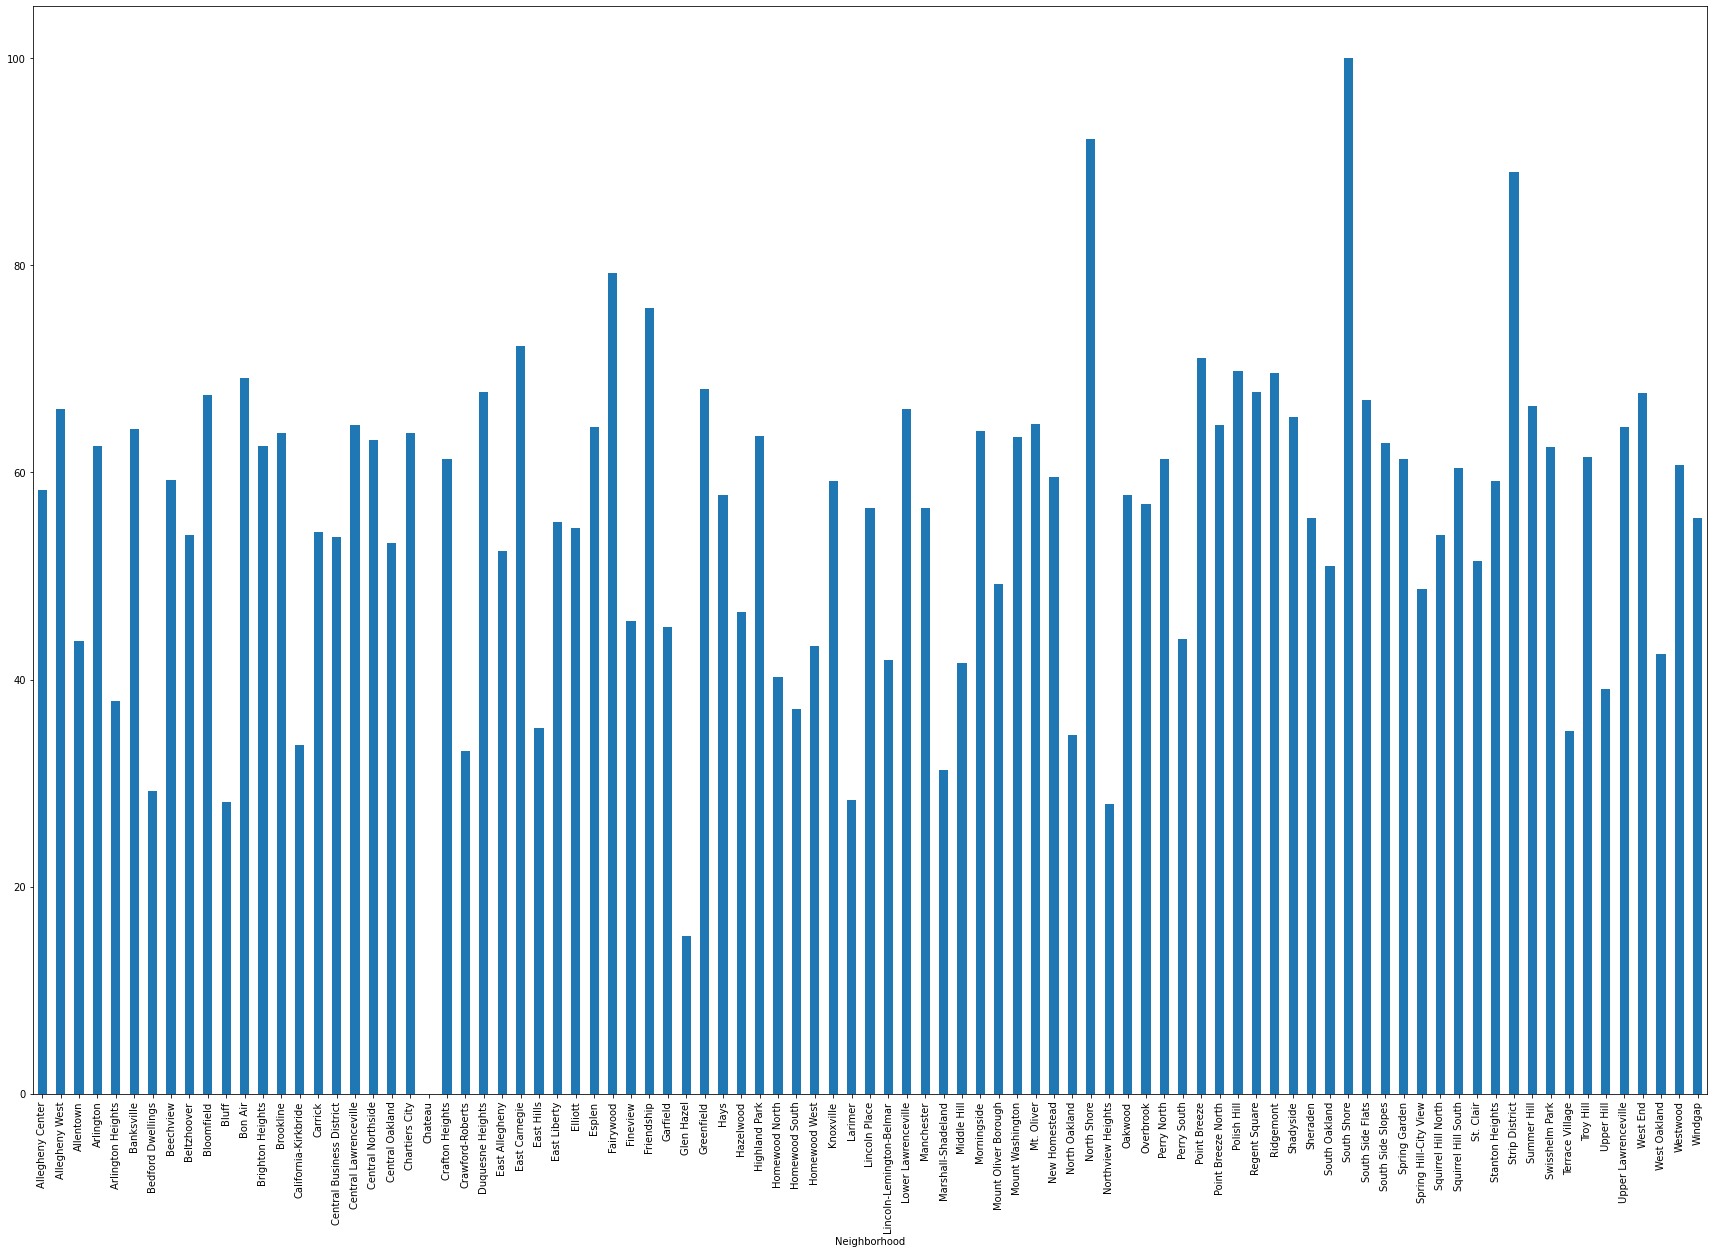

In [5]:
df.groupby('Neighborhood').agg('Employment Rate').sum().plot(kind='bar', x='Neighborhood', y='Employment Rate', rot=90, figsize = (30,20))

This is the bar chart depicting all of the neighborhoods and their employment rates. It's a bit hard to read, so next I just showed the top ten employment rates.

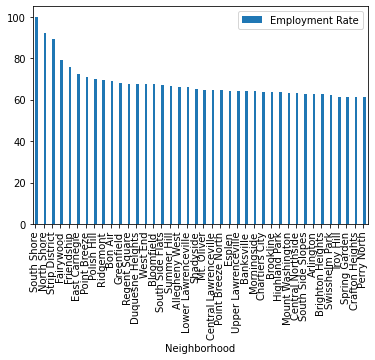

In [9]:
df.sort_values(by='Employment Rate', ascending=False).head(40).plot(kind='bar', x='Neighborhood', y='Employment Rate', align='edge', width=0.3)

By this metric alone, we can see that the South Shore neighborhood is the best neighborhood in Pittsburgh. However, it is a business district. Looking at this graph and exluding those, the best neighborhood by my metric is Fairywood. I am not from here, but from what I've heard, I'm suprised that it was not a well-known neighborhood like Shadyside. Although, this dataset is from 2014, and a lot of neighborhoods can change in six years. A high employment rate in a neighborhood is something to look for because it reflects the state of that neighborhood and generally means more investment/better economy in this area which means better community facilities, low commuting time, etc.